In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import sys

# Absolute path to project root
PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Change working directory to project root
os.chdir(PROJECT_ROOT)

# Add project root to Python path
if PROJECT_ROOT not in sys.path:
    sys.path.append(PROJECT_ROOT)

print("Current working directory:", os.getcwd())

Current working directory: c:\Users\venut\OneDrive\Desktop\credit_risk_project


In [2]:
df = pd.read_csv("Dataset/dataset.csv")

C:\Users\venut\AppData\Local\Temp\ipykernel_21584\584112672.py:1: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Dataset/dataset.csv")


In [3]:
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns
categorical_cols = df.select_dtypes(include=["object"]).columns

print("Numerical columns:", len(numerical_cols))
print("Categorical columns:", len(categorical_cols))

Numerical columns: 113
Categorical columns: 38


In [4]:
missing = df.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    "Missing Count": missing,
    "Missing %": missing_percentage
})

missing_df[missing_df["Missing Count"] > 0].head(20)

,Missing Count,Missing %
member_id,2260701,100.000000
orig_projected_additional_accrued_interest,2252050,99.617331
hardship_reason,2249784,99.517097
hardship_payoff_balance_amount,2249784,99.517097
hardship_last_payment_amount,2249784,99.517097
payment_plan_start_date,2249784,99.517097
hardship_type,2249784,99.517097
hardship_status,2249784,99.517097
hardship_start_date,2249784,99.517097
deferral_term,2249784,99.517097


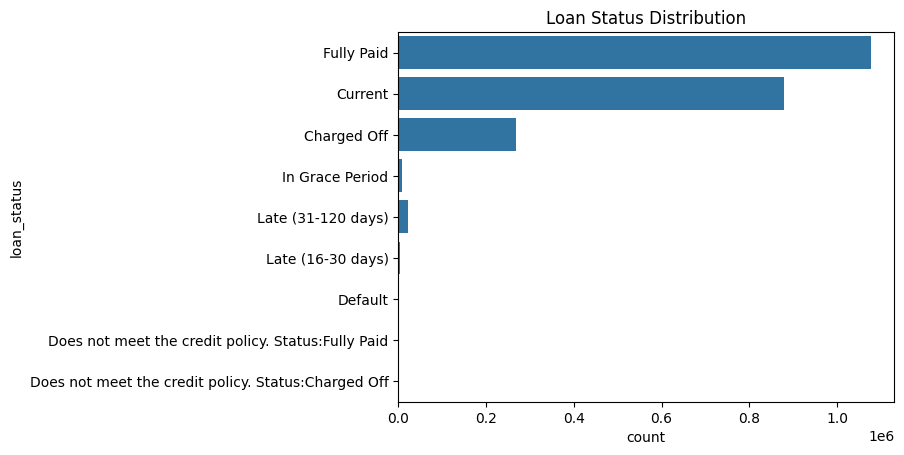

In [5]:
df["loan_status"].value_counts()

sns.countplot(y="loan_status", data=df)
plt.title("Loan Status Distribution")
plt.show()

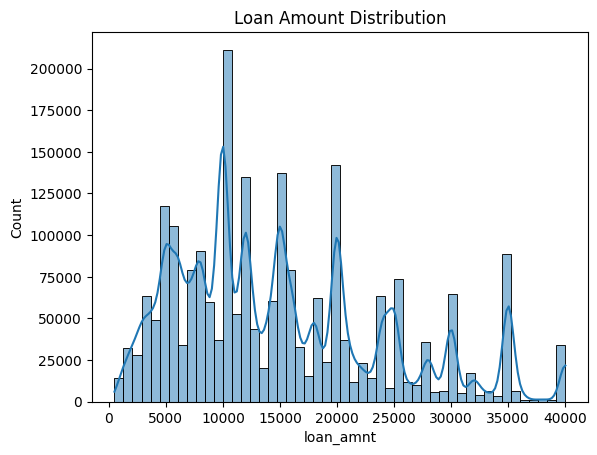

In [6]:
sns.histplot(df["loan_amnt"], bins=50, kde=True)
plt.title("Loan Amount Distribution")
plt.show()

The loan amount feature shows a right-skewed and multimodal distribution with clear peaks at standard loan slabs (e.g., 10k, 15k, 20k, 35k). This reflects LendingClub’s loan policy and borrower preferences rather than data quality issues. High loan amounts, although statistically appearing as outliers, are valid and potentially informative for credit risk modeling and therefore should not be removed during preprocessing.

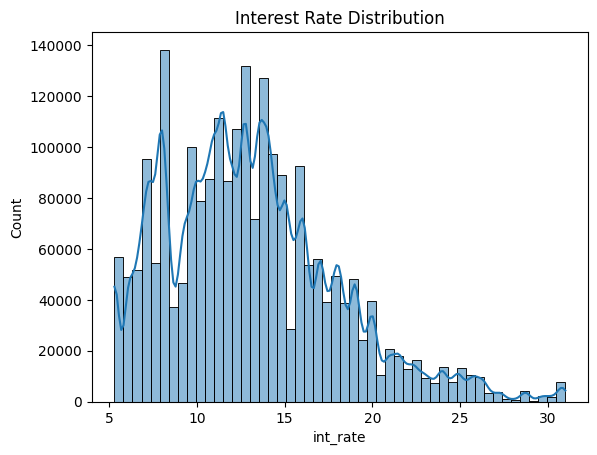

In [7]:
df["int_rate"] = df["int_rate"].astype(str).str.replace("%", "").astype(float)

sns.histplot(df["int_rate"], bins=50, kde=True)
plt.title("Interest Rate Distribution")
plt.show()

The interest rate feature shows a right-skewed distribution with most loans concentrated between 7% and 16%, and a long tail extending to higher rates. Interest rates are assigned based on borrower risk and loan characteristics, making this variable closely related to credit grade and expected default behavior. Extreme values represent high-risk borrowers and should be retained for modeling.

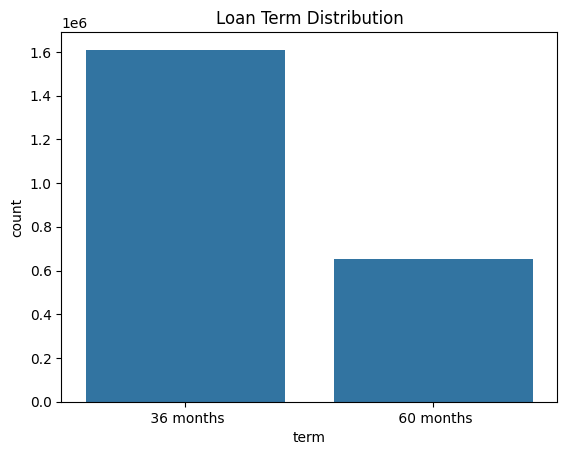

In [8]:
df["term"].value_counts()

sns.countplot(x="term", data=df)
plt.title("Loan Term Distribution")
plt.show()

The dataset contains two loan terms: 36 months and 60 months, with a strong preference toward 36-month loans. Since term represents a categorical repayment duration rather than a continuous numeric variable, it should be encoded appropriately during preprocessing. Longer loan terms may carry higher credit risk, making this a potentially important feature for default prediction.

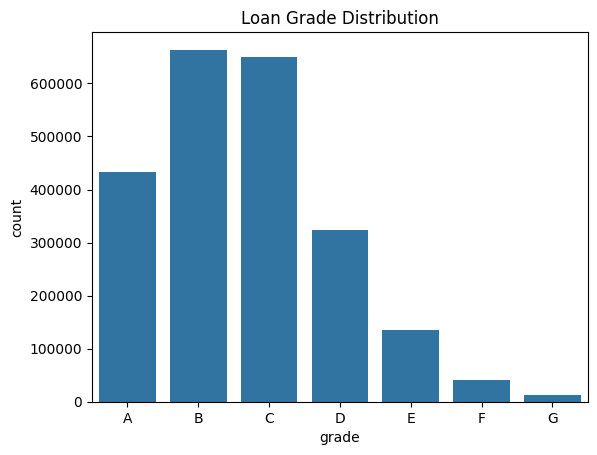

In [9]:
sns.countplot(x="grade", data=df, order=sorted(df["grade"].dropna().unique()))
plt.title("Loan Grade Distribution")
plt.show()

The loan grade feature shows a concentration in grades B and C, indicating that most borrowers fall into the medium-risk category. Grades A and D follow, while high-risk grades (E, F, G) are relatively rare due to lending policy constraints. Since grade represents an ordered risk classification, it should be treated as an ordinal categorical variable during preprocessing and is expected to be a strong predictor of loan default.

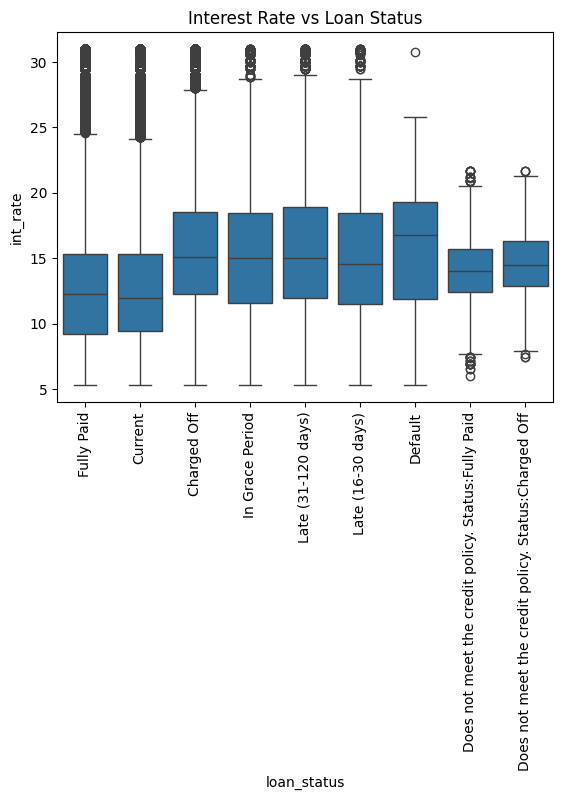

In [10]:
sns.boxplot(x="loan_status", y="int_rate", data=df)
plt.xticks(rotation=90)
plt.title("Interest Rate vs Loan Status")
plt.show()

The boxplot reveals a clear increasing trend in interest rates as loan performance worsens. Loans that are fully paid or current exhibit lower median interest rates, while charged-off and defaulted loans show significantly higher medians. This confirms that interest rate reflects borrower risk and has strong predictive relevance for credit risk modeling.

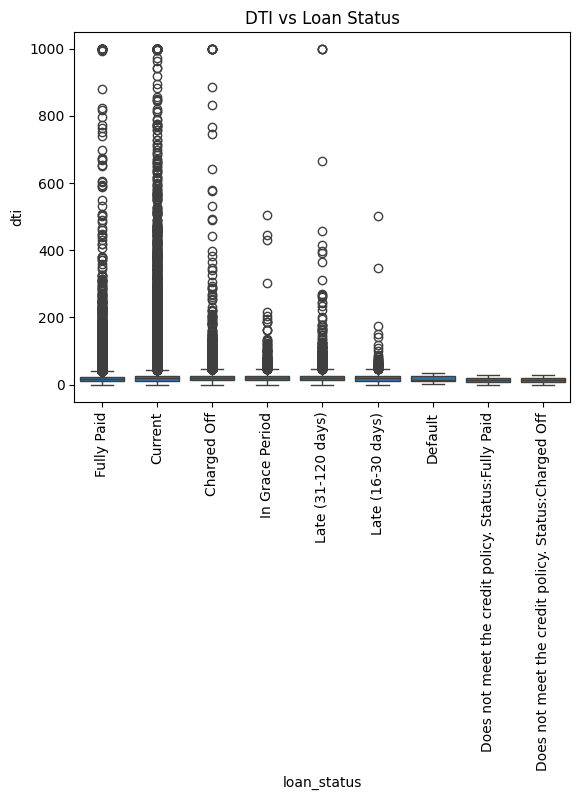

In [11]:
sns.boxplot(x="loan_status", y="dti", data=df)
plt.xticks(rotation=90)
plt.title("DTI vs Loan Status")
plt.show()

The DTI feature shows extreme outliers, with values exceeding realistic ranges, likely due to low or missing income during calculation. While higher DTI values are marginally associated with worse loan performance, the overlap between loan statuses is substantial, indicating that DTI alone is a weak predictor. Appropriate capping or cleaning of extreme DTI values will be necessary during preprocessing.

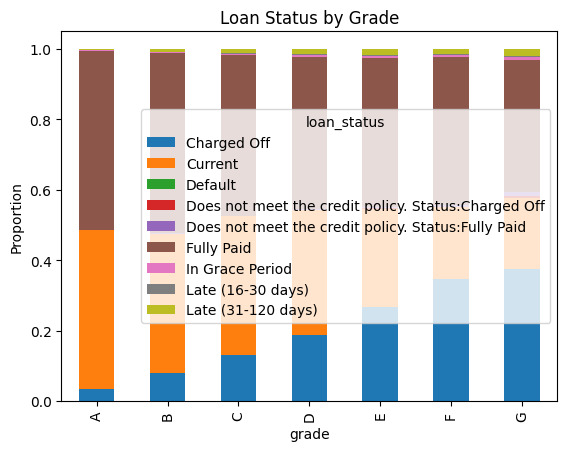

In [12]:
grade_status = pd.crosstab(df["grade"], df["loan_status"], normalize="index")

grade_status.plot(kind="bar", stacked=True)
plt.title("Loan Status by Grade")
plt.ylabel("Proportion")
plt.show()

The stacked bar chart shows a clear deterioration in loan performance as credit grade worsens from A to G. Higher-grade loans exhibit a larger proportion of fully paid outcomes, while lower-grade loans show increasing levels of charged-off, defaulted, and delinquent statuses. This confirms that credit grade is a strong ordinal predictor of loan default risk.

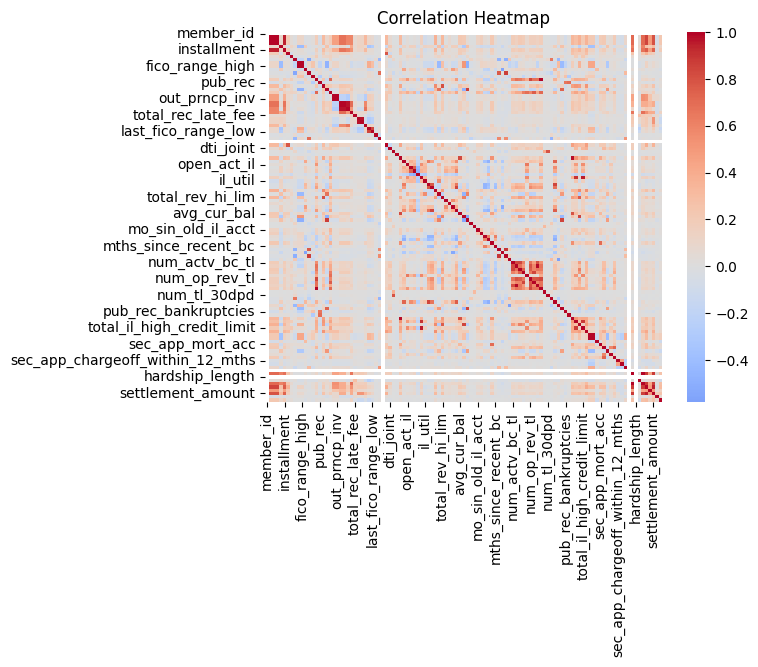

In [13]:
corr = df[numerical_cols].corr()

sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

The correlation heatmap reveals moderate correlations among related credit attributes such as FICO score ranges, revolving credit limits, and delinquency counts. No excessive multicollinearity is observed across the feature set. Several post-loan outcome variables and identifier fields were identified and removed to prevent data leakage. Overall, the dataset exhibits a healthy correlation structure suitable for tree-based classification models.

In [14]:
df.groupby("grade")["int_rate"].mean()

grade
A     7.084545
B    10.675806
C    14.143689
D    18.143067
E    21.829653
F    25.454091
G    28.074255
Name: int_rate, dtype: float64

In [15]:
df.groupby("term")["loan_amnt"].mean()

term
36 months    12745.526879
60 months    20738.458614
Name: loan_amnt, dtype: float64

In [16]:
column_summary = pd.DataFrame({
    "Column Name": df.columns,
    "Data Type": df.dtypes,
    "Missing %": df.isnull().mean() * 100
})

column_summary.to_csv("column_summary.csv", index=False)